<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/MIGMOBS_flujos_migratorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS LATAM

Exploración de datos migratorios

**Natalia Dedandi**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Flujos migratorios hacia ARGENTINA Y CHILE

Source 1: Global_Transnational_Mobility_dataset v2 (2025)

Abel, Guy (2019). Bilateral international migration flow estimates for 200 countries. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4470464




In [ ]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GTMD2_Data_MIGMOBS_share.csv'

mobility_df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
mobility_df.head()

code_i  code_j    country_i country_j  year iso2code_i iso2code_j  \
0       4       8  Afghanistan   Albania  1995         AF         AL   
1       4       8  Afghanistan   Albania  1996         AF         AL   
2       4       8  Afghanistan   Albania  1997         AF         AL   
3       4       8  Afghanistan   Albania  1998         AF         AL   
4       4       8  Afghanistan   Albania  1999         AF         AL   

  iso3code_i iso3code_j iso3code_ij  ... dgd_polity_i dgd_polity_j  \
0        AFG        ALB      AFGALB  ...          0.0          5.0   
1        AFG        ALB      AFGALB  ...         -7.0          0.0   
2        AFG        ALB      AFGALB  ...         -7.0          5.0   
3        AFG        ALB      AFGALB  ...         -7.0          5.0   
4        AFG        ALB      AFGALB  ...         -7.0          5.0   

  dgd_sanction_threat dgd_sanction_imposition  dgd_capital_const_j  \
0                 0.0                     0.0            102214.53   
1                 0.0                     0.0            103580.22   
2                 0.0                     0.0            103189.45   
3                 0.0                     0.0            102951.47   
4                 0.0                     0.0            103443.45   

  dgd_capital_const_i  dgd_agree_fta dgd_agree_eia  dgd_agree_cu  \
0                 NaN            0.0           0.0           0.0   
1                 NaN            0.0           0.0           0.0   
2                 NaN            0.0           0.0           0.0   
3                 NaN            0.0           0.0           0.0   
4                 NaN            0.0           0.0           0.0   

   dgd_agree_pta  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 65 columns]

In [ ]:
# Filter for countries CHL and ARG
cuntries_latam = ['CHL', 'ARG','VEN','BOL','PAR','PER','ECU','URY','COL','BRA','SUR']

#target_iso3 country of destiny
countries_target = ['CHL', 'ARG']

#target_iso3 country of origin
countries_origin = ['BOL', 'VEN']

countries_df = mobility_df[mobility_df['iso3code_j'].isin(countries_target)]

latam_df = mobility_df[
    mobility_df['iso3code_j'].isin(cuntries_latam) & mobility_df['iso3code_i'].isin(cuntries_latam)
]

mobility_df['year'] = mobility_df['year'].astype(int)

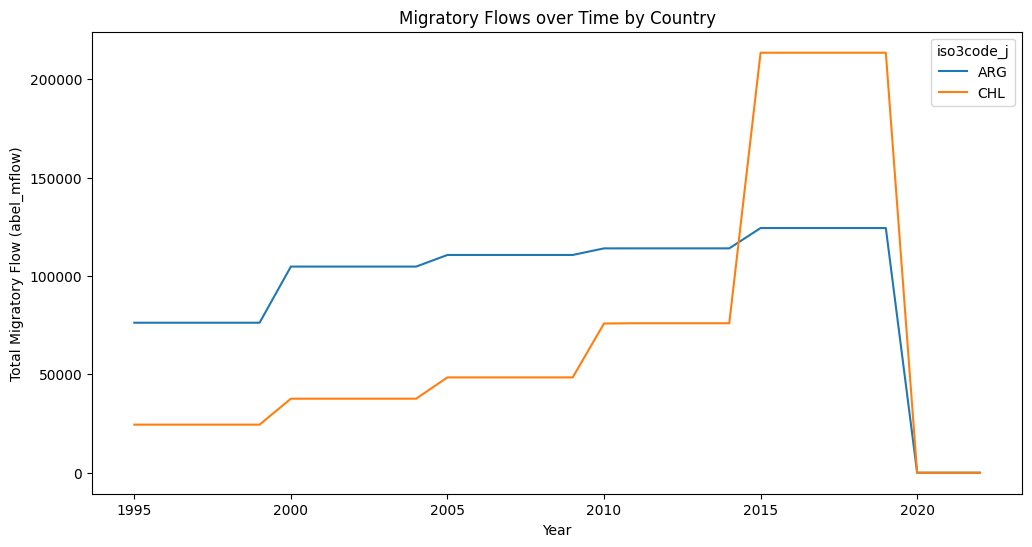

In [ ]:
# Group by 'iso3code_j' and 'year', summing 'abel_mflow'
grouped_df = countries_df.groupby(['iso3code_j', 'year'])['abel_mflow'].sum().reset_index()

# Assuming 'year' is a column in your DataFrame
grouped_df['year'] = grouped_df['year'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='abel_mflow', hue='iso3code_j', data=grouped_df)
plt.title('Migratory Flows over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()



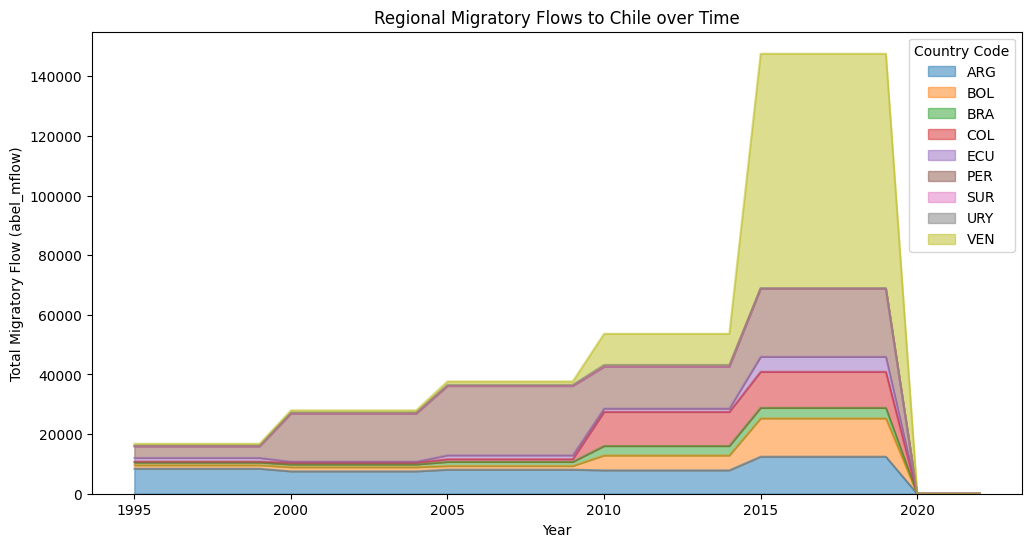

In [ ]:
# Filter for country_j = CHL
chl_df = latam_df[latam_df['iso3code_j'] == 'CHL']

# Pivotear los datos para formato wide (necesario para áreas apiladas)
pivot_df = chl_df.pivot(index='year', columns='iso3code_i', values='abel_mflow')

# Gráfico de áreas (no apiladas por defecto)
pivot_df.plot.area(alpha=0.5, figsize=(12, 6))  # alpha controla la transparencia

plt.title('Regional Migratory Flows to Chile over Time')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.legend(title='Country Code')
plt.show()


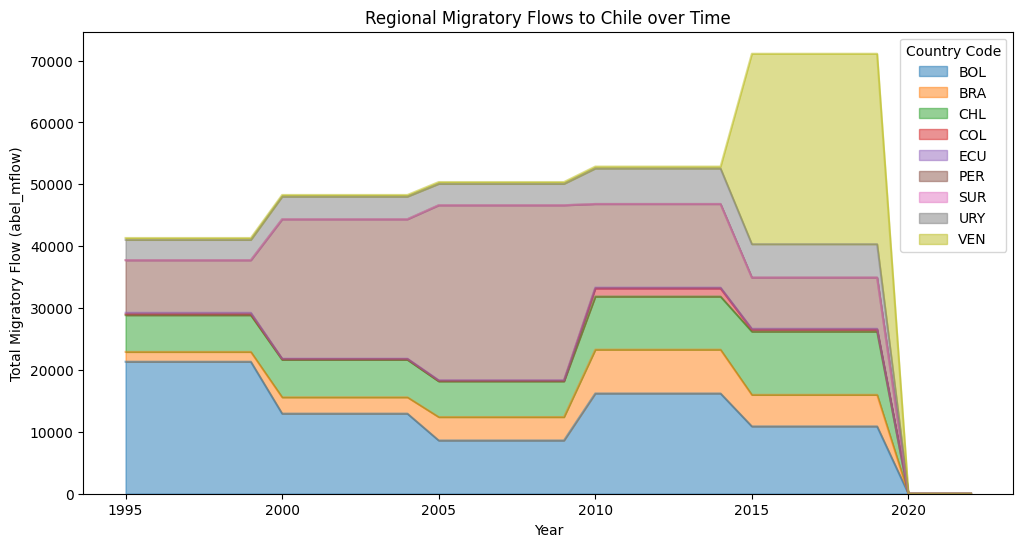

In [ ]:
# Filter for country_j = CHL
arg_df = latam_df[latam_df['iso3code_j'] == 'ARG']

# Pivotear los datos para formato wide (necesario para áreas apiladas)
pivot_df = arg_df.pivot(index='year', columns='iso3code_i', values='abel_mflow')

# Gráfico de áreas (no apiladas por defecto)
pivot_df.plot.area(alpha=0.5, figsize=(12, 6))  # alpha controla la transparencia

plt.title('Regional Migratory Flows to Chile over Time')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.legend(title='Country Code')
plt.show()

In [ ]:
# subset
latam_df_subset = latam_df[['iso3code_j', 'iso3code_i', 'year', 'abel_mflow']]


In [ ]:
pip install chord

In [ ]:
latam_df_subset = latam_df_subset.dropna(subset=['abel_mflow'])  # Eliminar filas con valores nulos en abel_mflow
latam_df_subset['abel_mflow'] = pd.to_numeric(latam_df_subset['abel_mflow'], errors='coerce')  # Convertir a numérico, coercer errores
latam_df_subset = latam_df_subset.dropna(subset=['abel_mflow'])  # Eliminar posibles nuevos NaN tras la conversión


# Filtrar para los años seleccionados
# Años a visualizar
years = [1995, 2010, 2019]

<ipython-input-72-6ae574dba788>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pip install holoviews

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
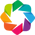

In [ ]:
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')


In [ ]:
# Crear visualizaciones para cada año
chords = []
for year in years:
    year_df = latam_df_subset[latam_df_subset['year'] == year]
    matrix = year_df.pivot_table(index='iso3code_i', columns='iso3code_j',
                                values='abel_mflow', aggfunc='sum').fillna(0)

    # Convertir a formato largo para HoloViews
    links = matrix.stack().reset_index()
    links.columns = ['source', 'target', 'value']
    links = links[links['value'] > 0]  # Filtrar conexiones con flujo

    # Crear el Chord diagram con opciones correctamente aplicadas
    chord = hv.Chord(links).select(value=(5, None))

    # Aplicar opciones en el formato correcto
    chord.opts(
        title=f'Flujos Migratorios {year}',
        cmap='Category20',
        edge_cmap='Category20',
        edge_color=dim('source').str(),
        labels='index',
        node_color=dim('index').str(),
        width=400,
        height=400,
        label_text_font_size='10pt',
        edge_alpha=0.8,
        node_line_color='black',
        tools=['hover'],
        toolbar='above'
    )

    chords.append(chord)

# Organizar en una fila
layout = hv.Layout(chords).cols(3)

# Mostrar el resultado
layout

:Layout
   .Chord.I   :Chord   [source,target]   (value)
   .Chord.II  :Chord   [source,target]   (value)
   .Chord.III :Chord   [source,target]   (value)

Analizo solo entre los 4 paises de estudio
ARG BOL CHL VEN

In [ ]:
# Países seleccionados
selected_countries = ['VEN', 'BOL', 'CHL', 'ARG']
years = [1995, 2000, 2010,2019]

# Definir colores personalizados para cada país
country_colors = {
    'VEN': '#FF0000',  # Rojo
    'BOL': '#00FF00',  # Verde
    'CHL': '#0000FF',  # Azul
    'ARG': '#FFA500'   # Naranja
}

# Crear visualizaciones para cada año
chords = []
for year in years:
    year_data = latam_df_subset[(latam_df_subset['year'] == year) &
                  (latam_df_subset['iso3code_i'].isin(selected_countries)) &
                  (latam_df_subset['iso3code_j'].isin(selected_countries))]
    matrix = year_data.pivot_table(index='iso3code_i', columns='iso3code_j',
                                values='abel_mflow', aggfunc='sum').fillna(0)

    # Convertir a formato largo para HoloViews
    links = matrix.stack().reset_index()
    links.columns = ['source', 'target', 'value']
    links = links[links['value'] > 0]  # Filtrar conexiones con flujo

    # Añadir tooltips y colores
    links['tooltip'] = links.apply(lambda x: f"{x['source']}→{x['target']}: {int(x['value'])}", axis=1)
    links['source_color'] = links['source'].map(country_colors)
    links['target_color'] = links['target'].map(country_colors)

    # Crear el Chord diagram
    chord = hv.Chord(links, ['source', 'target'], ['value', 'tooltip', 'source_color']).select(value=(4, None))

    # Aplicar opciones con colores personalizados
    chord.opts(
        title=f'Flujos Migratorios {year}',
        node_color=dim('index').str(),  # Color por país
        cmap=country_colors,            # Mapa de colores personalizado
        edge_color=dim('source').str(), # Color de conexión por país origen
        edge_cmap=country_colors,
        labels='index',
        width=400,
        height=400,
        label_text_font_size='10pt',
        edge_alpha=0.8,
        node_line_color='black',
        tools=['hover'],
        toolbar='above',
        edge_line_width=dim('value').norm()*8 + 1  # Grosor proporcional al valor
    )

    chords.append(chord)

# Organizar en una fila
layout = hv.Layout(chords).cols(4)

# Mostrar el resultado
layout

:Layout
   .Chord.I   :Chord   [source,target]   (value,tooltip,source_color)
   .Chord.II  :Chord   [source,target]   (value,tooltip,source_color)
   .Chord.III :Chord   [source,target]   (value,tooltip,source_color)
   .Chord.IV  :Chord   [source,target]   (value,tooltip,source_color)